# Cybersecurity Attack Analysis

In today’s digital world, cybersecurity threats are frequent and complex. This analysis aims to explore recent cybersecurity incidents within our organization to uncover patterns in attack frequency, severity, and types. By examining these aspects, we can better allocate resources, refine response protocols, and strengthen our defenses against future threats.

### Analysis Objectives

1. **Identify Attack Trends**: Examine when attacks peak and any factors contributing to these spikes.
2. **Assess Severity**: Understand the distribution of attack severity to prioritize our responses effectively.
3. **Explore Attack Types**: Identify the most frequent types of attacks to focus on common threats.
4. **Evaluate Response Actions**: Assess the actions taken for each attack type to find gaps in our current strategy.
5. **Analyze Anomaly Scores**: Study the range of anomaly scores to detect unusual attack patterns.

This analysis provides insights to support data-driven decisions in cybersecurity planning and response.

In [2]:
# Import necessary libraries
import pandas as pd

In [3]:
# Load the dataset
data = pd.read_csv('Downloads/archive (6)/cybersecurity_attacks.csv')

In [4]:
# We will display the first few rows to understand the structure and content of the dataset
print(data.head())

             Timestamp Source IP Address Destination IP Address  Source Port  \
0  2023-05-30 06:33:58     103.216.15.12           84.9.164.252        31225   
1  2020-08-26 07:08:30    78.199.217.198         66.191.137.154        17245   
2  2022-11-13 08:23:25      63.79.210.48          198.219.82.17        16811   
3  2023-07-02 10:38:46     163.42.196.10        101.228.192.255        20018   
4  2023-07-16 13:11:07     71.166.185.76        189.243.174.238         6131   

   Destination Port Protocol  Packet Length Packet Type Traffic Type  \
0             17616     ICMP            503        Data         HTTP   
1             48166     ICMP           1174        Data         HTTP   
2             53600      UDP            306     Control         HTTP   
3             32534      UDP            385        Data         HTTP   
4             26646      TCP           1462        Data          DNS   

                                        Payload Data  ... Action Taken  \
0  Qui natus

In [5]:
# Check for any missing values and data types
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

In [6]:
# Summary statistics of numerical columns
print(data.describe())

        Source Port  Destination Port  Packet Length  Anomaly Scores
count  40000.000000      40000.000000   40000.000000    40000.000000
mean   32970.356450      33150.868650     781.452725       50.113473
std    18560.425604      18574.668842     416.044192       28.853598
min     1027.000000       1024.000000      64.000000        0.000000
25%    16850.750000      17094.750000     420.000000       25.150000
50%    32856.000000      33004.500000     782.000000       50.345000
75%    48928.250000      49287.000000    1143.000000       75.030000
max    65530.000000      65535.000000    1500.000000      100.000000


# Assumptions

A simple review of our dataset has given us insights into our data structure and we will make the following assumptions below:

- **Data Gaps**: Since some columns have missing values (e.g., Malware Indicators, Alerts/Warnings, Proxy Information, Firewall Logs, and IDS/IPS Alerts), we can assume these entries were either unavailable during logging or weren’t triggered in specific cases. For now, we'll explore different ways to handle these gaps based on data distribution and requirements.
- **CEO-Friendly Insights**: The goal is to make the data analysis accessible to a CEO without a cybersecurity background, so we’ll focus on simplifying complex metrics and making actionable recommendations.
- **Key Focus Areas**: Given the attributes and the nature of the industry, we’ll focus on trends in key columns such as Attack Types, Severity Levels, Anomaly Scores(it is a number that says how much current behavior is different from the expected), and Action Taken for detecting patterns and summarizing the data.
- **Timeframe and Scope:** The analysis will cover all available historical data from the year 2020 through 2023 and will explore attack patterns over time, common types of attacks, severity, anomaly scores, and actions taken in response.
- **Dataset Relevance:** The dataset provided contains relevant information about historical cyber-attacks faced by the organization, including attack types, severity levels, response actions, and anomaly scores.

# Tools Selection
- **Pandas** for data manipulation and preprocessing.
- **Numpy** for numerical operations
- **Matplotlib** and Seaborn for visualizing attack trends and patterns.

# Data Preprocessing and Cleaning

In [10]:
# Importing necessary libraries
import numpy as np
from datetime import datetime

# Convert the 'Timestamp' column to datetime this allows for time-based grouping and trend analysis.
data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')

# Fill missing categorical data with 'Unknown' based on the output that shows only cat columns with missing values
data.fillna('Unknown', inplace=True)

# Verify no missing values remain
print(data.isnull().sum())

Timestamp                 0
Source IP Address         0
Destination IP Address    0
Source Port               0
Destination Port          0
Protocol                  0
Packet Length             0
Packet Type               0
Traffic Type              0
Payload Data              0
Malware Indicators        0
Anomaly Scores            0
Alerts/Warnings           0
Attack Type               0
Attack Signature          0
Action Taken              0
Severity Level            0
User Information          0
Device Information        0
Network Segment           0
Geo-location Data         0
Proxy Information         0
Firewall Logs             0
IDS/IPS Alerts            0
Log Source                0
dtype: int64


# Exploratory Data Analysis (EDA)
We will focus on identifying patterns in cybersecurity attacks, which are essential for a CEO's understanding of trends and risks. This includes:

- **Attack Trends Over Time**: Monthly or yearly attack trends, focusing on frequency.
- **Severity Level Distribution**: Understanding which severity levels are most common.
- **Most Frequent Attack Types**: Identifying which types of attacks are most common.
- **Action Taken**: Insights into how each type of attack was handled (Blocked, Ignored, logged, etc.).
- **Anomaly Scores**: Distribution of anomaly scores to highlight which attacks were most severe.

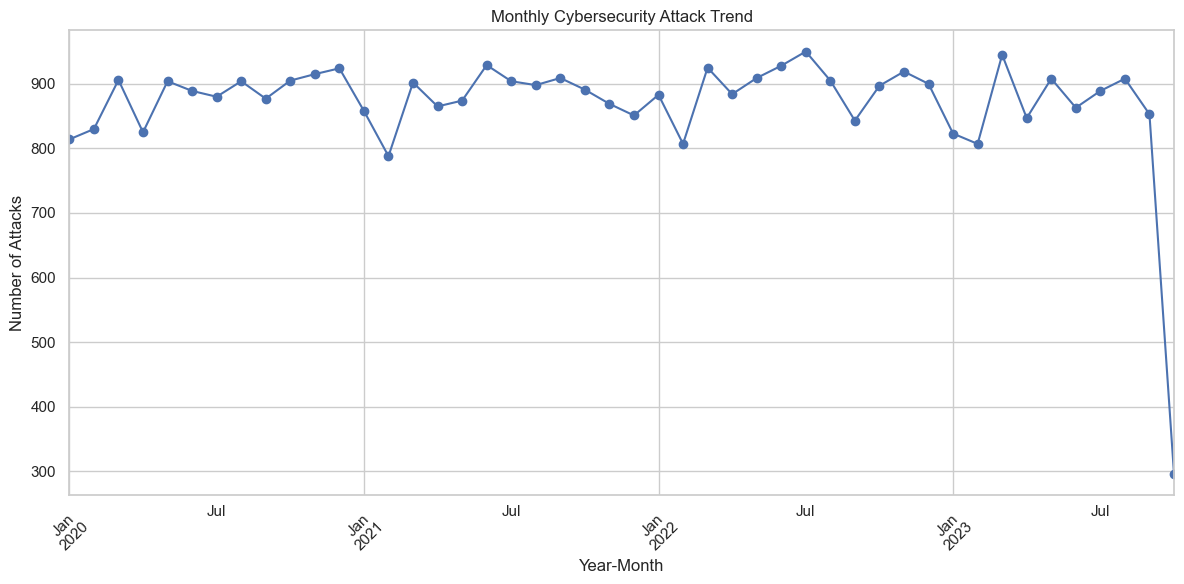

In [12]:
# Necessary libraries for EDA
import matplotlib.pyplot as plt
import seaborn as sns


# Attack Trend Over Time

# plot style
sns.set(style="whitegrid")

# Extract month and year from 'Timestamp' for trend analysis
data['Year_Month'] = data['Timestamp'].dt.to_period('M')

# Count attacks per month
monthly_attacks = data.groupby('Year_Month').size()

# We will plot on a monthly basis using a line graph to give the CEO a clearer insight into attacks 

# Plot the monthly trend of attacks
plt.figure(figsize=(12, 6))
monthly_attacks.plot(kind='line', marker='o', color='b')
plt.title('Monthly Cybersecurity Attack Trend')
plt.xlabel('Year-Month')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Key Finding: Q1 Spikes,  High Points in July 2022 and March 2023**

- The plots show significant spikes in the first quarter(March) of every year. The start of a new year often coincides with the release of new software and hardware. These new releases can introduce vulnerabilities that attackers exploit.
- For the high points in July 2022 and March 2023, specific events or holidays during these months might have increased online activity, creating more opportunities for attacks.

/var/folders/ql/9pqgmvgs3qq8hz11k1qprp0m0000gn/T/ipykernel_61125/3429662760.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Severity Level', data=data, palette='Reds')


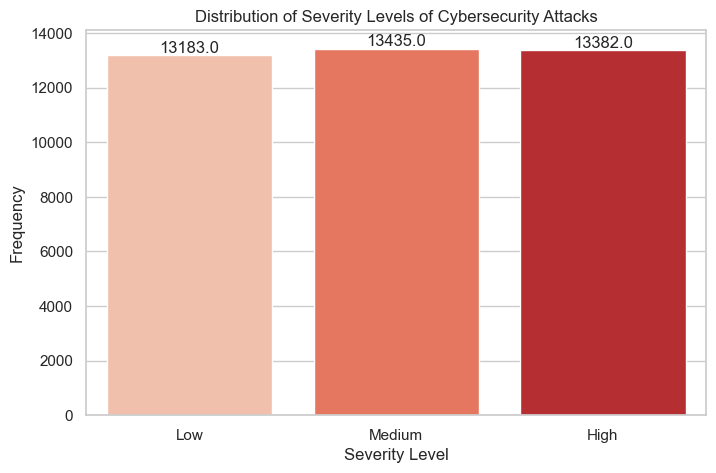

In [14]:
# Severity Level Distribution

# Plot the distribution of severity levels
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Severity Level', data=data, palette='Reds')
plt.title('Distribution of Severity Levels of Cybersecurity Attacks')
plt.xlabel('Severity Level')
plt.ylabel('Frequency')

# Add values on top of each bar for clarity
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), textcoords='offset points')

plt.show()


**Key Finding:**

- While high-severity attacks pose the greatest risk, the data indicates that **medium-severity** cyberattacks are the most frequent (13435.0) type of attack the organization faces. While these attacks may not be as devastating as high-severity attacks, they can still cause significant disruptions and financial losses. Also, this may have a direct relationship with **'Ignored'** action taken on attacks.



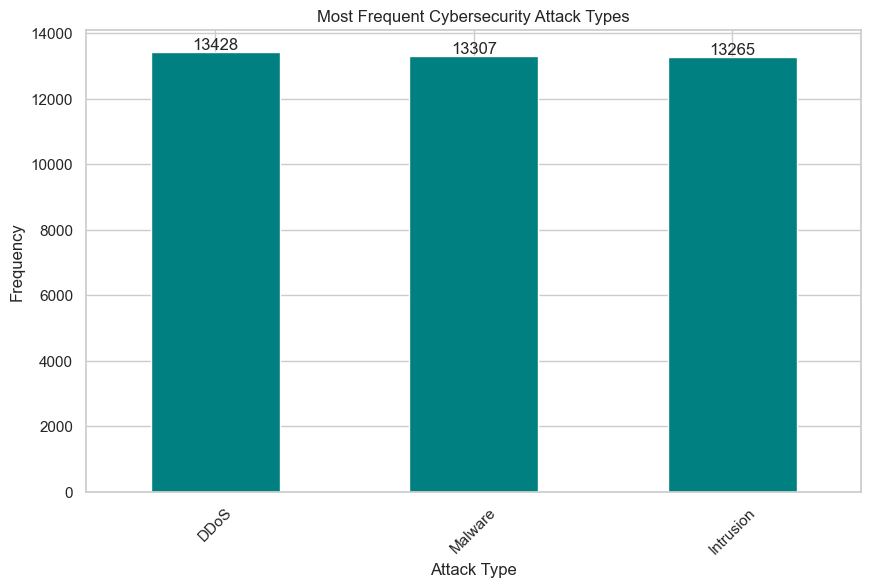

In [16]:
# Most Frequent Attack Types

# Plot the top 10 most frequent attack types
plt.figure(figsize=(10, 6))
top_attack_types = data['Attack Type'].value_counts().nlargest(10)
ax = top_attack_types.plot(kind='bar', color='teal')
plt.title('Most Frequent Cybersecurity Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Add values on top of each bar for clarity
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), textcoords='offset points')

plt.show()


**Key Finding:**

- The data indicates that Distributed Denial of Service (DDoS) attacks, malware infections, and intrusions are the most common types of cybersecurity attacks faced by the organization and **DDoS(Distributed Denial of Service)** has the highest frequency.

/var/folders/ql/9pqgmvgs3qq8hz11k1qprp0m0000gn/T/ipykernel_61125/1978663487.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Action Taken', data=data, palette='Set2')


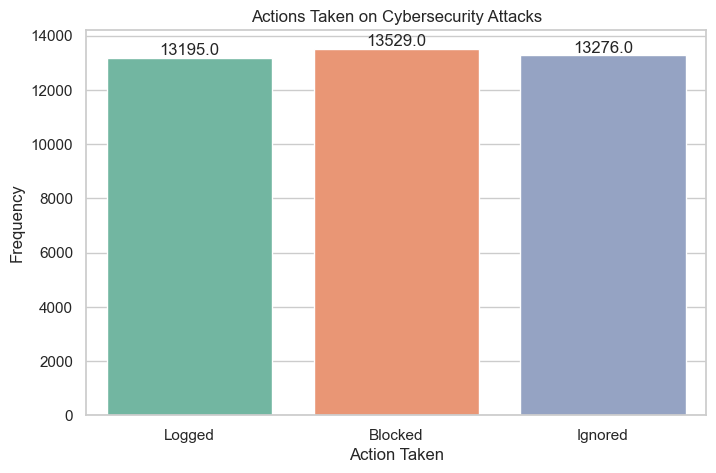

In [18]:
# Action Taken

# Plot distribution of actions taken
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Action Taken', data=data, palette='Set2')
plt.title('Actions Taken on Cybersecurity Attacks')
plt.xlabel('Action Taken')
plt.ylabel('Frequency')

# Add values on top of each bar for clarity
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), textcoords='offset points')

plt.show()


**Key Finding: A Significant Proportion of Attacks are Ignored**

- The data reveals that a substantial number (13276) of cybersecurity attacks are ignored. While logging and blocking are important actions, the high frequency of ignored attacks suggests a potential gap in the security response strategy.

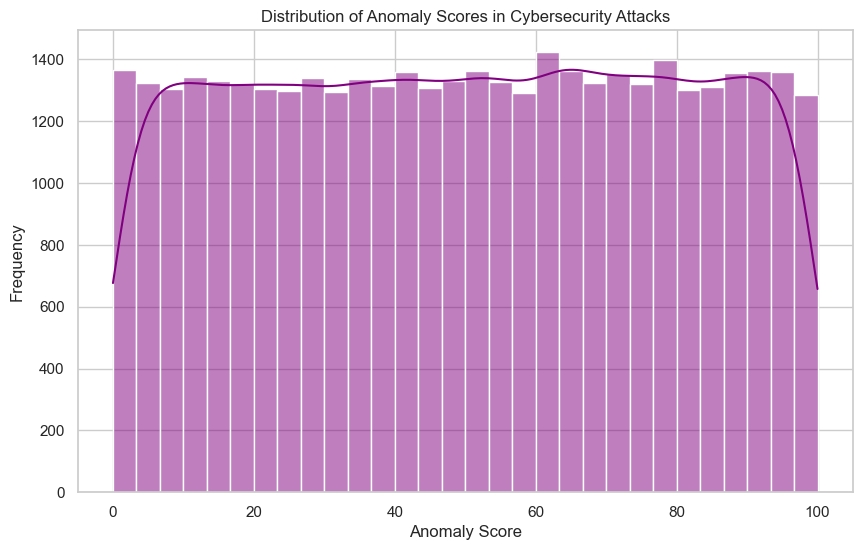

In [20]:
# Anomaly Scores
# Plot the distribution of anomaly scores
plt.figure(figsize=(10, 6))
sns.histplot(data['Anomaly Scores'], bins=30, kde=True, color='purple')
plt.title('Distribution of Anomaly Scores in Cybersecurity Attacks')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.show()


**Key Finding: A Wide Range of Anomaly Scores with a Central Tendency**

- The distribution of anomaly scores indicates a diverse range of attack behaviors, with a concentration around the central points 60 - 80 with a frequency of about 1400. This central tendency suggests that a significant portion of the attacks are relatively common, and while some are highly anomalous attacks, the majority of attacks exhibit behaviors that deviate moderately from the norm.

# Further Analysis - Correlation Analysis
- We will analyze correlations between Severity Level, Attack Type, and Anomaly Score. This could reveal if certain types of attacks consistently have higher anomaly scores or severity levels.

In [23]:
# Correlation Analysis

#Convert categorical variables to numerical if necessary
data['Severity Level'] = data['Severity Level'].map({'Low': 1, 'Medium': 2, 'High': 3})
data['Attack Type'] = pd.factorize(data['Attack Type'])[0]  # Factorize Attack Type for correlation

# Calculate correlation matrix
correlation_matrix = data[['Severity Level', 'Attack Type', 'Anomaly Scores']].corr()

# Display correlation matrix
print(correlation_matrix)

                Severity Level  Attack Type  Anomaly Scores
Severity Level        1.000000    -0.000745        0.000936
Attack Type          -0.000745     1.000000       -0.002084
Anomaly Scores        0.000936    -0.002084        1.000000


- The correlation analysis suggests that there is no relationship between these features. This analysis highlights the need for a multifaceted security approach that doesn’t rely solely on anomaly scores or attack types to assess threat severity.

## Recommendations Based on Key Findings

#### Addressing Q1 Spikes and Seasonal Attack Peaks:
- Recommendation: Implement heightened monitoring and patch management strategies at the beginning of each year, with increased vigilance around high-risk periods (e.g., March and July).
- Suggested Actions: Schedule vulnerability scans and software updates post-new releases to minimize exploitation of unpatched software or hardware vulnerabilities.
  
#### Managing Medium-Severity Attacks:
- Recommendation: While medium-severity attacks are not as critical as high-severity attacks, their frequency means they could lead to disruptions or cumulative impacts.
- Suggested Actions: Re-evaluate the security policy around medium-severity threats, especially those currently ignored, and consider automated mitigation measures to reduce potential financial or operational risks.

#### Top Attack Types - Strengthen DDoS and Malware Defenses:
- Recommendation: Given the high occurrence of DDoS and malware attacks, enhance protections against these specific threats.
- Suggested Actions: To reduce malware spread, invest in DDoS mitigation solutions, strengthen network perimeter defenses, and enhance endpoint protection. Regular employee training on phishing and malware prevention could also reduce malware infections.

#### Review and Reassess Ignored Attacks:
- Recommendation: The high number of ignored attacks points to a potential gap in response. It may be necessary to refine criteria for ignoring attacks to ensure critical threats are not overlooked.
- Suggested Actions: Conduct a review of the ignored attack list and establish new thresholds or criteria for response. Automated alerts for medium- and high-anomaly scores could help prioritize attacks that currently go unaddressed.

#### Utilizing Anomaly Score Patterns for Threat Intelligence:
- Recommendation: The central clustering of anomaly scores around 60-80 suggests that many attacks follow predictable patterns. However, high-anomaly outliers need more immediate investigation.
- Suggested Actions: Implement a rule-based or machine-learning model to flag and prioritize high-anomaly scores, improving early detection of potential zero-day or advanced persistent threats.

 # Conclusion

The analysis emphasizes the need for proactive measures and refined response protocols. A robust cybersecurity strategy should prioritize addressing medium-severity incidents, exploring the ignored response strategy, and reinforcing defenses against frequently occurring attack types.

